# **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# **Load and preprocess the MNIST dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


# **Build the model with a configurable activation function**

In [ ]:
def create_model(activation_function):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(64, activation=activation_function),
        Dense(32, activation=activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models
model_relu = create_model('relu')
model_tanh = create_model('tanh')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Train both models**

In [ ]:
history_relu = model_relu.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
history_tanh = model_tanh.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7961 - loss: 0.6835 - val_accuracy: 0.9542 - val_loss: 0.1524
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9594 - loss: 0.1406 - val_accuracy: 0.9656 - val_loss: 0.1146
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9716 - loss: 0.0980 - val_accuracy: 0.9649 - val_loss: 0.1127
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9787 - loss: 0.0701 - val_accuracy: 0.9723 - val_loss: 0.0892
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9823 - loss: 0.0591 - val_accuracy: 0.9753 - val_loss: 0.0786
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9860 - loss: 0.0453 - val_accuracy: 0.9706 - val_loss: 0.0959
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9900 - loss: 0.0334 - val_accuracy: 0.9750 - val_loss: 0.0819
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy:

# **Evaluate both models**

In [ ]:
relu_test_loss, relu_test_acc = model_relu.evaluate(x_test, y_test, verbose=0)
tanh_test_loss, tanh_test_acc = model_tanh.evaluate(x_test, y_test, verbose=0)
print(f"\nReLU Model - Test Accuracy: {relu_test_acc:.4f}, Test Loss: {relu_test_loss:.4f}")
print(f"Tanh Model - Test Accuracy: {tanh_test_acc:.4f}, Test Loss: {tanh_test_loss:.4f}")


ReLU Model - Test Accuracy: 0.9748, Test Loss: 0.0953
Tanh Model - Test Accuracy: 0.9788, Test Loss: 0.0752


# **Create comparison table**

In [ ]:
results_df = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Loss'],
    'ReLU': [relu_test_acc, relu_test_loss],
    'Tanh': [tanh_test_acc, tanh_test_loss]
})
def highlight_best(val, col):
    if col == 'ReLU':
        return 'background-color: lightgreen' if val >= results_df[col].max() else 'background-color: lightcoral'
    elif col == 'Tanh':
        return 'background-color: lightgreen' if val >= results_df[col].max() else 'background-color: lightcoral'
    return ''

styled_table = results_df.style.apply(lambda row: [highlight_best(v, c) if c in ['ReLU', 'Tanh'] else '' for c, v in row.items()], axis=1)
styled_table.set_caption("Model Performance Comparison").format(precision=4)
display(styled_table)

,Metric,ReLU,Tanh
0,Test Accuracy,0.9748,0.9788
1,Test Loss,0.0953,0.0752


# **Enhanced accuracy and loss plots**

/tmp/ipython-input-10-2336890831.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-10-2336890831.py:23: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


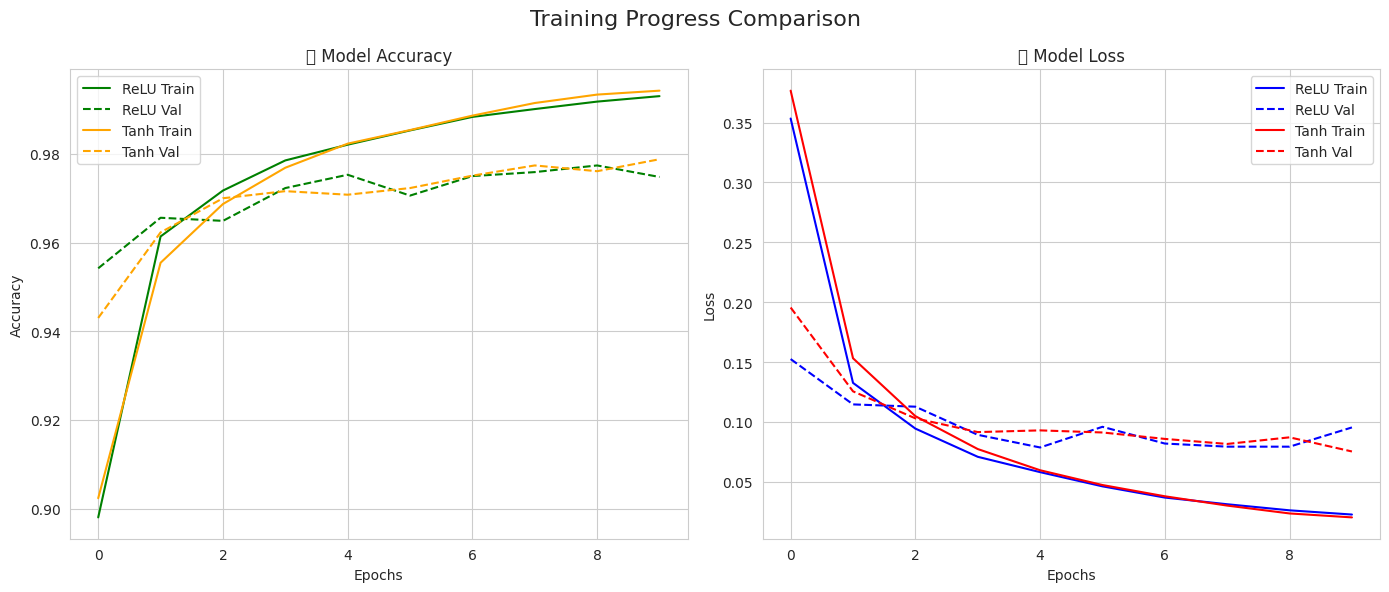

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.set_style("whitegrid")

ax[0].plot(history_relu.history['accuracy'], label='ReLU Train', color='green')
ax[0].plot(history_relu.history['val_accuracy'], label='ReLU Val', linestyle='--', color='green')
ax[0].plot(history_tanh.history['accuracy'], label='Tanh Train', color='orange')
ax[0].plot(history_tanh.history['val_accuracy'], label='Tanh Val', linestyle='--', color='orange')
ax[0].set_title("📈 Model Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history_relu.history['loss'], label='ReLU Train', color='blue')
ax[1].plot(history_relu.history['val_loss'], label='ReLU Val', linestyle='--', color='blue')
ax[1].plot(history_tanh.history['loss'], label='Tanh Train', color='red')
ax[1].plot(history_tanh.history['val_loss'], label='Tanh Val', linestyle='--', color='red')
ax[1].set_title("📉 Model Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.suptitle("Training Progress Comparison", fontsize=16)
plt.tight_layout()
plt.show()

# **Predictions for both models**

In [ ]:
images = x_test[:9]
labels = np.argmax(y_test[:9], axis=1)

predicted_classes_relu = np.argmax(model_relu.predict(images), axis=1)
predicted_classes_tanh = np.argmax(model_tanh.predict(images), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


# **Display predictions from ReLU model**

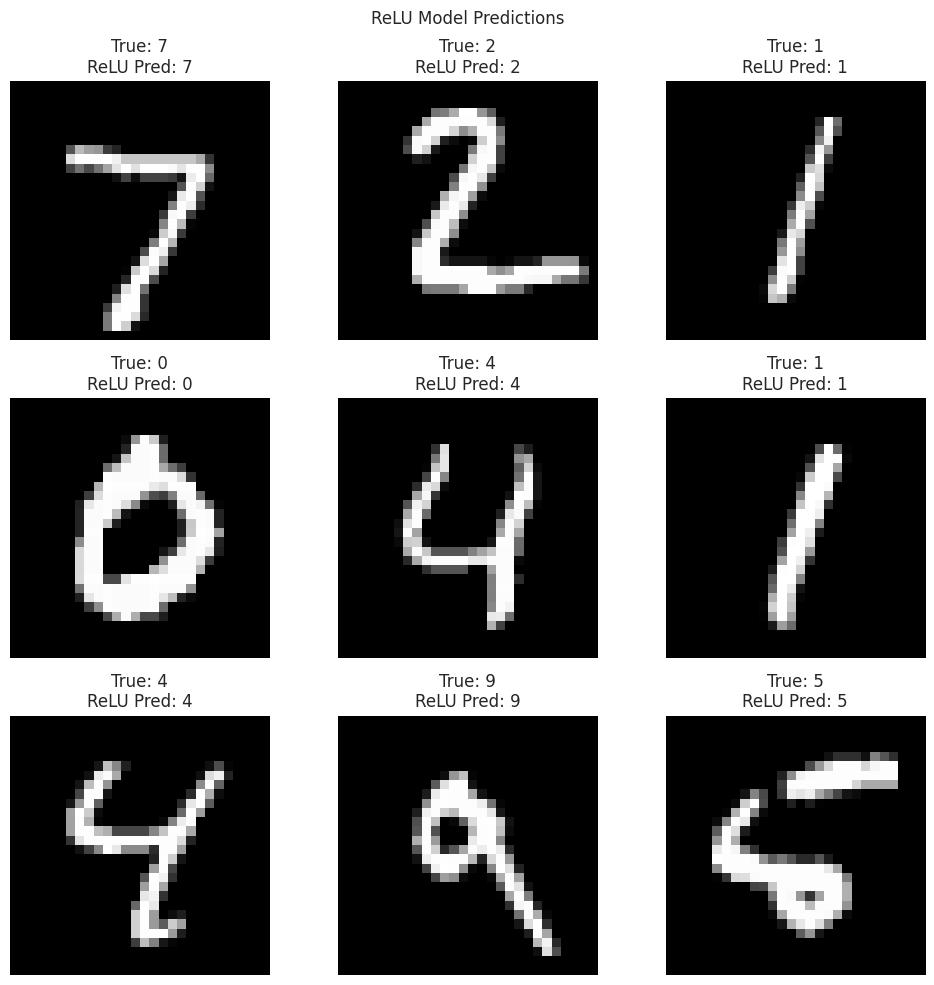

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"True: {labels[i]}\nReLU Pred: {predicted_classes_relu[i]}")
    plt.axis('off')
plt.suptitle('ReLU Model Predictions')
plt.tight_layout()
plt.show()

# **Display predictions from Tanh model**

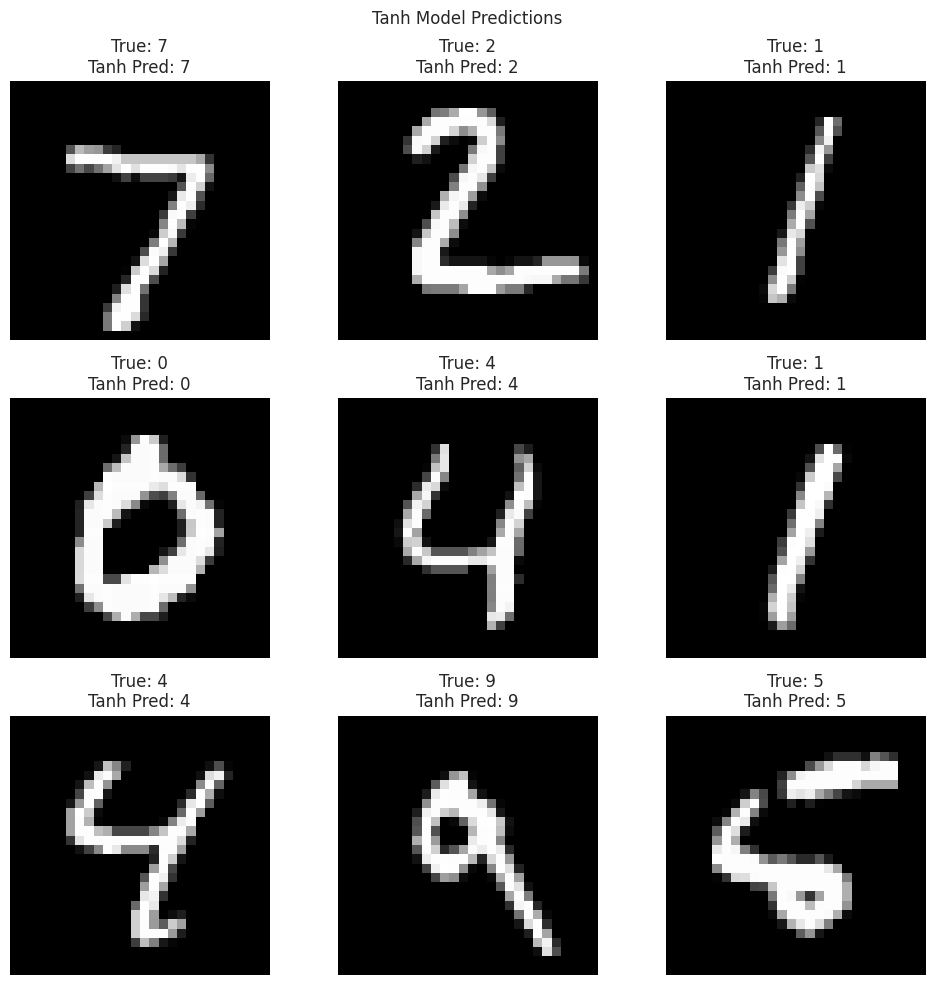

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"True: {labels[i]}\nTanh Pred: {predicted_classes_tanh[i]}")
    plt.axis('off')
plt.suptitle('Tanh Model Predictions')
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_relu = np.argmax(model_relu.predict(x_test), axis=1)
y_pred_tanh = np.argmax(model_tanh.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix for ReLU model
cm_relu = confusion_matrix(y_true, y_pred_relu)
disp_relu = ConfusionMatrixDisplay(confusion_matrix=cm_relu)
fig, ax = plt.subplots(figsize=(8,6))
disp_relu.plot(ax=ax, cmap='Greens')
plt.title('Confusion Matrix - ReLU Model')
plt.show()

# Confusion matrix for Tanh model
cm_tanh = confusion_matrix(y_true, y_pred_tanh)
disp_tanh = ConfusionMatrixDisplay(confusion_matrix=cm_tanh)
fig, ax = plt.subplots(figsize=(8,6))
disp_tanh.plot(ax=ax, cmap='Oranges')
plt.title('Confusion Matrix - Tanh Model')
plt.show()


In [ ]:

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(y_true, color='blue', label='Actual', kde=True, stat='density', bins=10)
sns.histplot(y_pred_relu, color='green', label='Predicted (ReLU)', kde=True, stat='density', bins=10, alpha=0.6)
plt.title('Distribution of Actual vs Predicted Classes - ReLU Model')
plt.xlabel('Digit Class')
plt.legend()
plt.show()


In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(cm_relu, annot=True, fmt='d', cmap='Greens')
plt.title('Heatmap of Confusion Matrix - ReLU Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:

fig, ax = plt.subplots(figsize=(8,6))
metrics = ['Test Accuracy', 'Test Loss']
relu_values = [relu_test_acc, relu_test_loss]
tanh_values = [tanh_test_acc, tanh_test_loss]

bar_width = 0.35
index = np.arange(len(metrics))

ax.bar(index, relu_values, bar_width, label='ReLU', color='green')
ax.bar(index + bar_width, tanh_values, bar_width, label='Tanh', color='orange')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Test Accuracy and Loss Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()
